At learning rate 0.001 :
Cost: [117101432.38485503, 116796846.18553273, 116493190.23673879, 116190461.68152502, 115888657.67171983, 115587775.36790109, 115287811.93936928, 114988764.56412083, 114690630.42882119, 114393406.72877851, 114097090.66791664, 113801679.45874915, 113507170.32235254, 113213560.4883402, 112920847.19483604, 112629027.68844841, 112338099.22424404, 112048059.06572206, 111758904.48478802, 111470632.76172808, 111183241.18518339, 110896727.0521243, 110611087.66782482, 110326320.34583701, 110042422.40796582, 109759391.18424337, 109477224.01290396, 109195918.24035873, 108915471.22117063, 108635880.31802936, 108357142.90172619, 108079256.35112949, 107802218.05315955, 107526025.40276404, 107250675.80289324, 106976166.66447556, 106702495.40639289, 106429659.45545639, 106157656.24638185, 105886483.22176561, 105616137.83206032, 105346617.53555079, 105077919.7983298, 104810042.09427434, 104542981.90502153, 104276736.71994494, 104011304.03613056, 103746681.35835338, 103482866.1

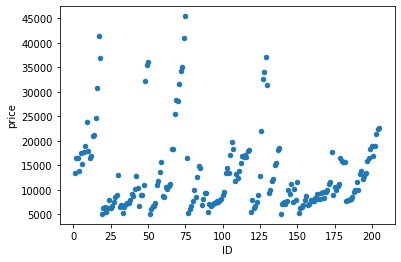

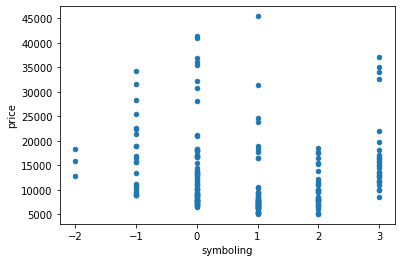

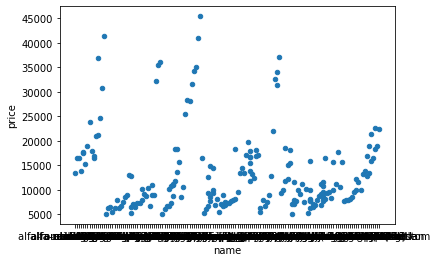

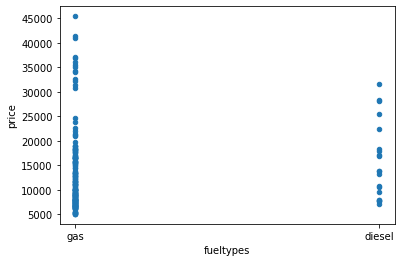

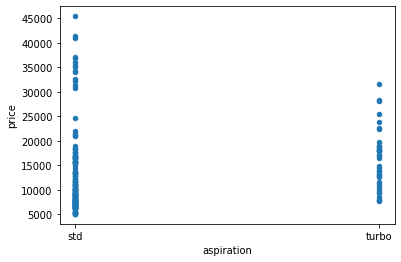

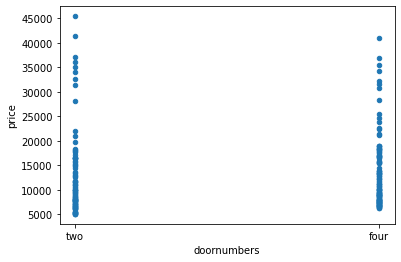

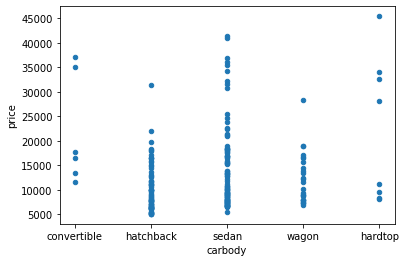

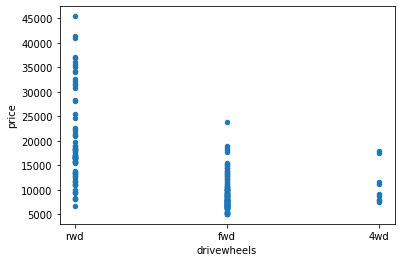

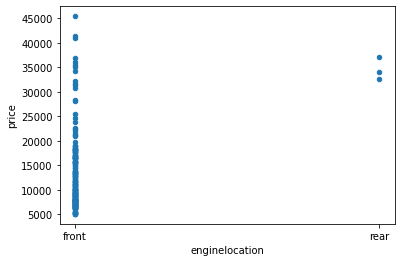

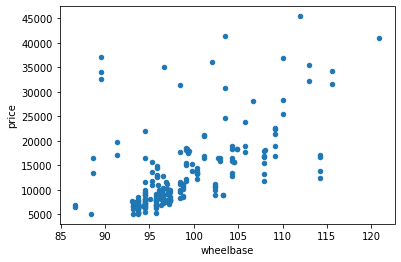

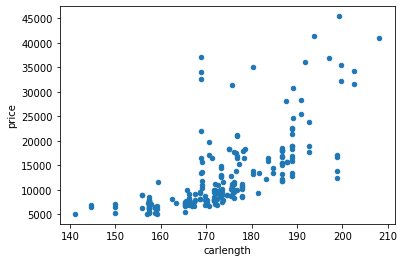

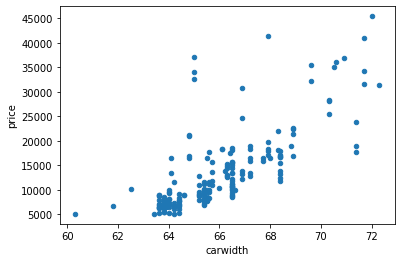

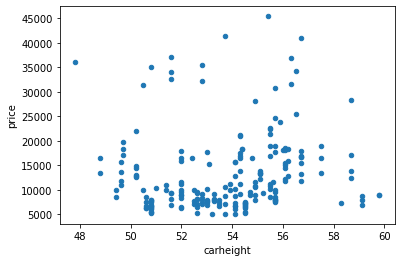

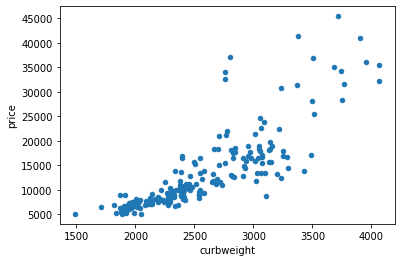

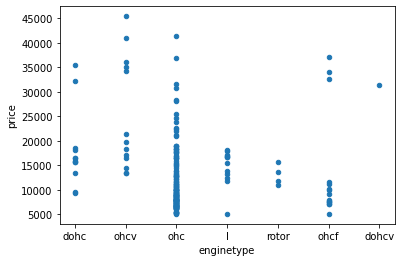

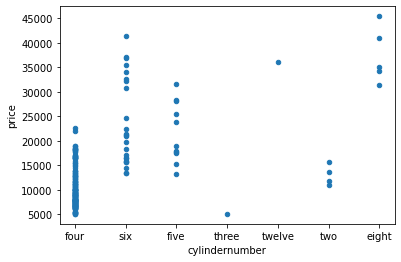

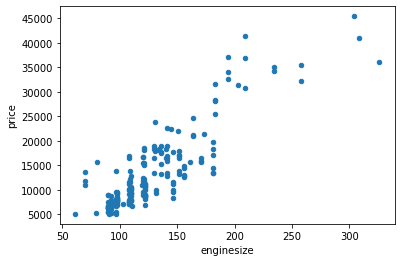

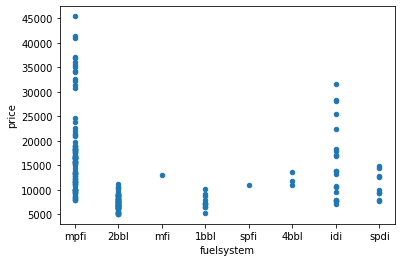

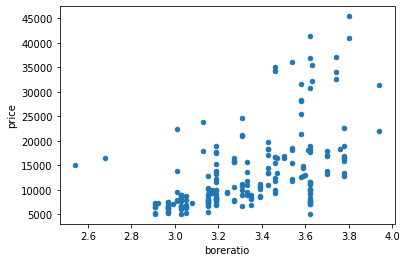

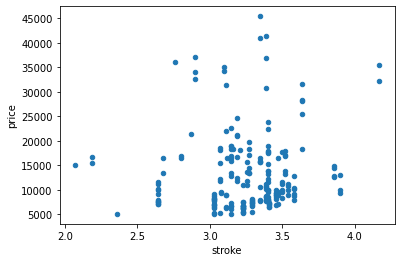

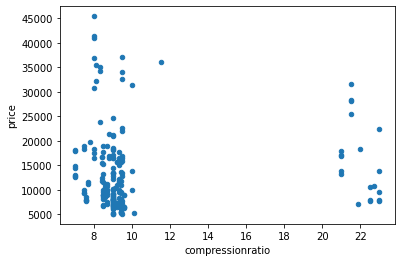

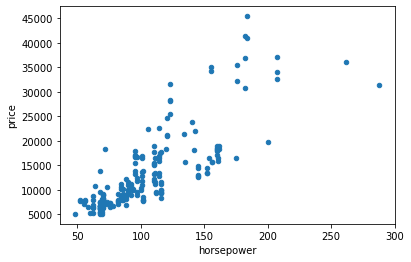

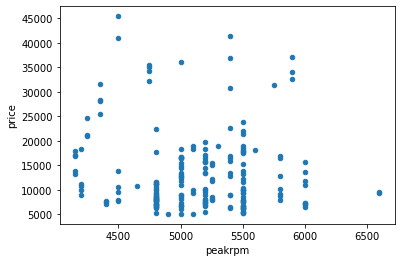

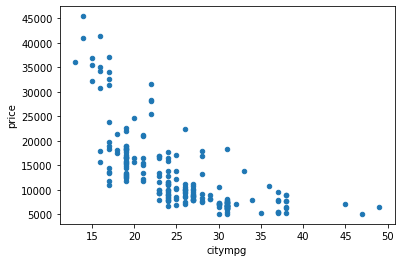

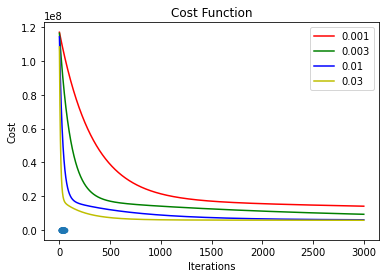

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import math
#scatter plots between different features
car_data = pd.read_csv("car_data.csv")
car_data.plot.scatter(y='price',x='ID')
car_data.plot.scatter(y='price',x='symboling') 
car_data.plot.scatter(y='price',x='name')
car_data.plot.scatter(y='price',x='fueltypes')
car_data.plot.scatter(y='price',x='aspiration')
car_data.plot.scatter(y='price',x='doornumbers')
car_data.plot.scatter(y='price',x='carbody')
car_data.plot.scatter(y='price',x='drivewheels')
car_data.plot.scatter(y='price',x='enginelocation')
car_data.plot.scatter(y='price',x='wheelbase')
car_data.plot.scatter(y='price',x='carlength')
car_data.plot.scatter(y='price',x='carwidth')
car_data.plot.scatter(y='price',x='carheight')
car_data.plot.scatter(y='price',x='curbweight')
car_data.plot.scatter(y='price',x='enginetype')
car_data.plot.scatter(y='price',x='cylindernumber')
car_data.plot.scatter(y='price',x='enginesize')
car_data.plot.scatter(y='price',x='fuelsystem') 
car_data.plot.scatter(y='price',x='boreratio')
car_data.plot.scatter(y='price',x='stroke')
car_data.plot.scatter(y='price',x='compressionratio')
car_data.plot.scatter(y='price',x='horsepower')
car_data.plot.scatter(y='price',x='peakrpm')
car_data.plot.scatter(y='price',x='citympg')
car_data.plot.scatter(y='price',x='highwaympg')

#we made this to know which feature will be selected to be trained
#correlation function
cor=car_data.corr()
cor
    
#abs function
threshold=0.5
a=abs(cor['price'])
result=a[a>0.5]  #pandas series
result=result.sort_values(ascending=False)
result=result.head(5)
#print(result)

#load ,reading and splitting the data
def readData(multi, ratio):

    #reading dataset
    car_data = pd.read_csv("car_data.csv")


    #shuffle each dataset’s rows
    #converting the data to dataframe to make shuffle
    df=pd.DataFrame(car_data)
    # shuffle the DataFrame rows
    df = shuffleData(df)
  
    #droping the unwanted features
    x = df[['carwidth','curbweight','enginesize','horsepower']]

    #make y the output
    y = df['price']

    #normalize the feature data
    x = normalizeData(x)

    #to get smaller values of thetas and smaller cost function
    #y = normalizeData(y)

    #adding a new column called ones for X0
    x.insert(0,'Ones',1)

    #convert from dataframes to numpy matrices to faclitate multiplications phase
    x=np.array(x)
    y=np.array(y).flatten()
    theta=np.array([0,0,0,0,0])   #theta0,theta1,theta2,theta3

    #Split the dataset into training and testing sets.
    total_rows = df.shape[0]
    train_size = int(total_rows*ratio)
    xtrain=x[0:train_size]
    ytrain=y[0:train_size]
    xtest=x[train_size:]
    ytest=y[train_size:]
    
    m=len(xtrain)
    return xtrain, ytrain, xtest, ytest, theta, m


#data normalization
def normalizeData(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
  
#data shuffling
def shuffleData(df):
    return df.sample(frac = 1)

#Cost Function
def costFunction(xTrain,yTrain,theta,m): 
    J = np.sum((xTrain.dot(theta)-yTrain)**2)/2/m 
    # m -> Number of training Examples
    # the dot product x0thete0-y+x1theta1+... -> (HYPOTHSIS Function)
    # y -> actual output
    return J


#Gradient Descent
def gradientDescent(xTrain,yTrain,theta,learningRate,iterations,m):
    cost_history = [0] * iterations 
    for it in range(iterations):
      hypothesis=xTrain.dot(theta) #calculate hypothesis function
      loss=hypothesis-yTrain #predicted output - actual output
      gradient=xTrain.T.dot(loss)/m 
      theta=theta - (learningRate*gradient)
      cost=costFunction(xTrain,yTrain,theta,m)#calculate cost function
      cost_history[it]=cost #saves each cost function value
    return theta, cost_history #return the best theta and cost history

def printThetas(thetas):
    i = 0
    for x in thetas:
        print("Theta", i, ": ", x)
        i += 1


def runModel(multi):
    iterations = 3000
    trainRatio = 0.8
    learningRate = [0.001, 0.003, 0.01, 0.03]
    colors = ['r', 'g', 'b', 'y']
    i = 0
    choice = 'Cost Function'
    plot.title(choice)
    plot.xlabel('Iterations')
    plot.ylabel('Cost')
    xtrain, ytrain, xtest, ytest, theta, m = readData(multi, trainRatio)
    for lr in learningRate:   
        thetas, costHistory = gradientDescent(xtrain,ytrain,theta,lr,iterations,m)
        plot.plot(costHistory, c=colors[i], label=str(lr))
        i += 1
        print("At learning rate", lr, ":")
        print("Cost:", costHistory)
        printThetas(thetas)
    plot.legend()
    plot.show()
    
runModel(False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
